In [32]:
import pandas as pd
import pandas_profiling
import seaborn as sns

In [35]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(20.7,8.27)})

In [39]:
def add_value_labels(ax, spacing=5, rot=45):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center', rotation=rot,                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
# add_value_labels(ax)


In [3]:
df = pd.read_excel('EDA Instructions and Data.xlsx', sheet_name=2)

In [4]:
df.head()

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
0,A0144701,DOG,HAVANESE,VT 12,IMPOUNDED,NaN,NaN,1,P0098773,6301,...,11:31:00,R19-558731,K19-486742,NaN,APP SICK,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020
1,A0442587,DOG,TERRIER MIX,FREEZER,IMPOUNDED,NaN,NaN,1,P0492284,7102,...,00:00:00,NaN,K19-486954,NaN,DEAD,SCAN CHIP,OVER THE COUNTER,NaN,NOV.2019,FY2020
2,A0458972,DOG,CATAHOULA,RECEIVING,UNAVAILABLE,NaN,A19-195601,1,P9991718,4600,...,13:36:00,NaN,K19-482022,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN NO CHIP,SWEEP,NaN,OCT.2019,FY2020
3,A0525642,DOG,GERM SHEPHERD,INJD 001,IMPOUNDED,NaN,A19-196573,1,P0903792,16605,...,17:35:00,NaN,K19-483073,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,SWEEP,TAGGED,OCT.2019,FY2020
4,A0565586,DOG,SILKY TERRIER,LFD 119,UNAVAILABLE,NaN,NaN,1,P0890077,6900,...,12:57:00,R19-558750,K19-486694,NaN,APP WNL,SCAN CHIP,OVER THE COUNTER,RETURNED TO OWNER,NOV.2019,FY2020


In [5]:
df.sample(10)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year
12988,A1092643,CAT,DOMESTIC SH,LFC 045,AVAILABLE,NaN,A20-208374,1,P0914397,4201,...,09:25:00,NaN,K20-493279,NaN,APP WNL,SCAN NO CHIP,FIELD,NaN,JAN.2020,FY2020
17323,A1095883,CAT,DOMESTIC SH,LFC 012,UNAVAILABLE,NaN,NaN,1,P0918688,7202,...,09:25:00,NaN,K20-497702,NaN,APP INJ,SCAN NO CHIP,OVER THE COUNTER,NaN,FEB.2020,FY2020
7649,A1089231,DOG,CHIHUAHUA LH,CC 04,IMPOUNDED,NaN,NaN,1,P0908940,10101,...,16:36:00,R19-559668,K19-488587,NaN,APP WNL,SCAN NO CHIP,OVER THE COUNTER,PRE-ADOPTED,NOV.2019,FY2020
14998,A1094389,DOG,PIT BULL,RECEIVING,IMPOUNDED,NaN,A20-211049,1,P9991704,8500,...,11:57:00,NaN,K20-495731,NaN,APP WNL,SCAN CHIP,SWEEP,NaN,JAN.2020,FY2020
3726,A1085307,DOG,GERM SHEPHERD,RECEIVING,IMPOUNDED,NaN,A19-196772,1,P9991765,16701,...,17:45:00,NaN,K19-483304,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,OCT.2019,FY2020
6310,A1087804,DOG,SCHNAUZER MIN,DC 03,UNAVAILABLE,NaN,A19-200410,1,P9991781,2500,...,15:55:00,R19-558675,K19-486606,NaN,APP WNL,SCAN CHIP,FIELD,RETURNED TO OWNER ; SX 11/09/19,NOV.2019,FY2020
14322,A1095472,DOG,POMERANIAN,LOST,IMPOUNDED,NaN,NaN,0,P0918101,NaN,...,00:00:00,NaN,K20-497165,NaN,NaN,NaN,NaN,NaN,FEB.2020,FY2020
11196,A1091902,DOG,YORKSHIRE TERR,RECEIVING,IMPOUNDED,NaN,A19-207322,1,P9991778,8703,...,15:13:00,NaN,K19-492222,NaN,UNKNOWN,SCAN NO CHIP,FIELD,NaN,DEC.2019,FY2020
14545,A1095515,CAT,DOMESTIC SH,AC 027,UNAVAILABLE,NaN,NaN,1,P0549189,9103,...,15:23:00,R20-564318,K20-497215,NaN,APP WNL,UNABLE TO SCAN,OVER THE COUNTER,JEJ,FEB.2020,FY2020
18165,A1096418,DOG,PIT BULL,INJD 007,IMPOUNDED,NaN,NaN,1,P0818887,500,...,17:43:00,NaN,K20-498380,NaN,APP INJ,SCAN NO CHIP,OVER THE COUNTER,NaN,FEB.2020,FY2020


In [6]:
html_str_output = pandas_profiling.ProfileReport(df)
html_str_output

In [7]:
#First let's investigate the columns that are messed up.
#Tag Type, Census Tract, Council District, Staff ID, Service Request Number, Addtional Information, Year

In [10]:
df['Tag Type'].value_counts(dropna = False)

NaN    22557
Name: Tag Type, dtype: int64

In [11]:
#ok, we can get rid of tag type

In [12]:
df['Census Tract'].value_counts(dropna = False)

20500.0    3684
NaN        2758
11900.0     241
11602.0     237
17102.0     236
           ... 
31804.0       1
14127.0       1
15800.0       1
13104.0       1
13727.0       1
Name: Census Tract, Length: 312, dtype: int64

In [13]:
#lot of Nans, but should we keep it?

In [15]:
df['Council District'].value_counts(dropna=False)

6      5158
NaN    2758
4      2404
8      2238
5      2069
7      1609
1      1436
3      1413
2       869
9       751
10      456
14      392
13      392
11      347
12      250
0        11
AS        4
Name: Council District, dtype: int64

In [16]:
#this one seems useful.  same Nans as census tract, but better filled and simpler

In [18]:
df['Staff Id'].value_counts(dropna = False)

CDM        1334
WEB        1328
DL         1053
CBU         931
BW          854
           ... 
BBB8448       1
AAK1780       1
RY1776        1
BCD1779       1
ACO           1
Name: Staff Id, Length: 490, dtype: int64

In [19]:
#this is interesting.  we should keep this, there is some serious overrepresentation of staffIDs here.
#maybe we can explore correlations between outcome types and staff ID

In [21]:
df['Service Request Number'].value_counts(dropna = False)

NaN                22501
2000087228            36
982126057960114        2
1901377000             2
15-00091153            2
1901-242798            2
2000427938             1
1901329295             1
2000280489             1
1901457301             1
982126057679937        1
2000144038             1
`                      1
1901262130             1
1901216914             1
2000264650             1
2000454003             1
1901457372             1
Name: Service Request Number, dtype: int64

In [22]:
#this may not be worth keeping.  No revealing information and way too many NANs to track

In [24]:
df['Additional Information'].value_counts(dropna= False)

NaN                              13320
ADOPTED                           2426
FOSTER                            1142
TAGGED                             831
RETURNED TO OWNER                  668
                                 ...  
SRM1774                              1
HWT 2&3/INJD 8A                      1
RETURNED TO OWNER SX 01/30/20        1
RETURNED TO OWNER SX 01/13/20        1
RETURNED TO OWNERSX11/11             1
Name: Additional Information, Length: 1023, dtype: int64

In [25]:
#this seems similar to Outcome, may need to investigate further, but it may be superfluous

In [26]:
df['Year'].value_counts(dropna=False)

FY2020    22557
Name: Year, dtype: int64

In [27]:
#unremarkable, can drop.

In [28]:
#we can certainly drop Tag Type and Year.


In [30]:
df = df.drop(columns = ['Tag Type'])

In [31]:
df = df.drop(columns = ['Year'])

<AxesSubplot:xlabel='Animal Type', ylabel='count'>

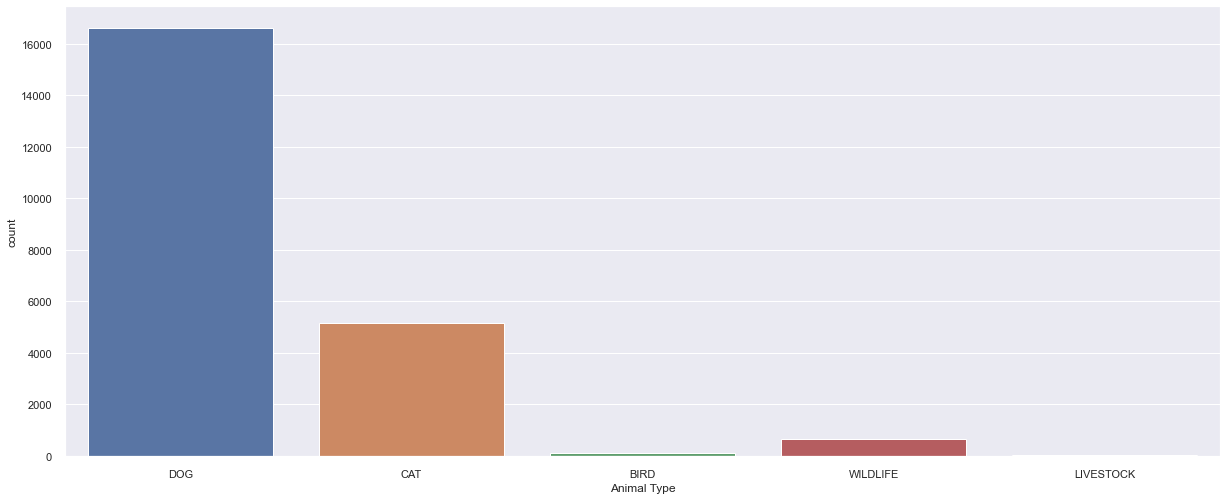

In [36]:
sns.countplot(df['Animal Type'])

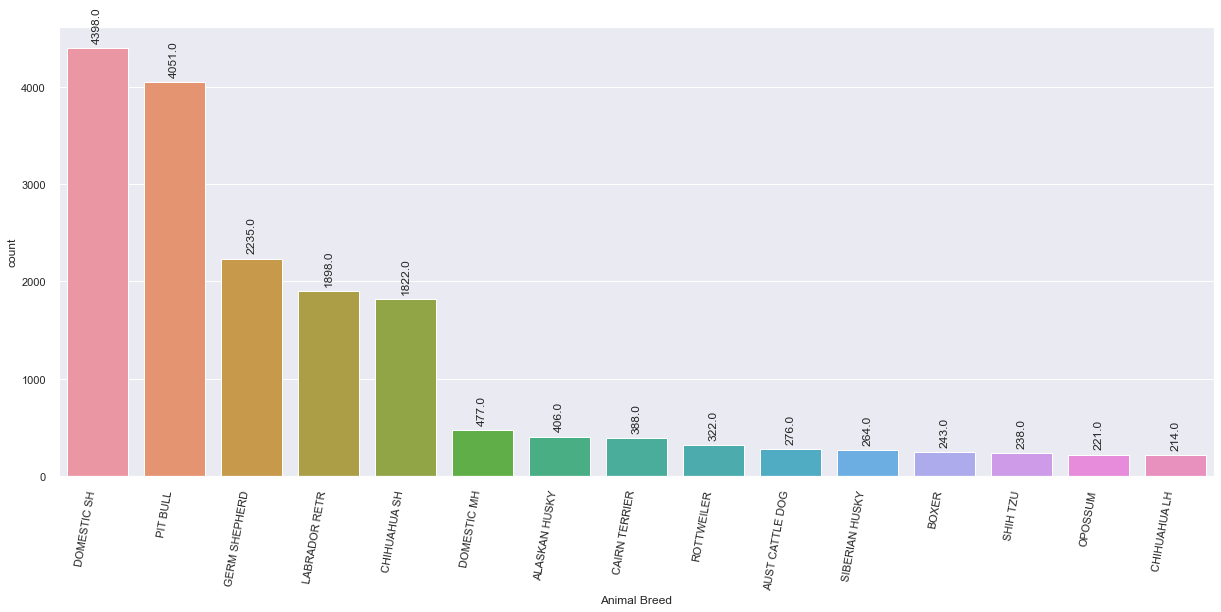

In [46]:
ax = sns.countplot(df['Animal Breed'], order=df['Animal Breed'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

<AxesSubplot:xlabel='Council District', ylabel='count'>

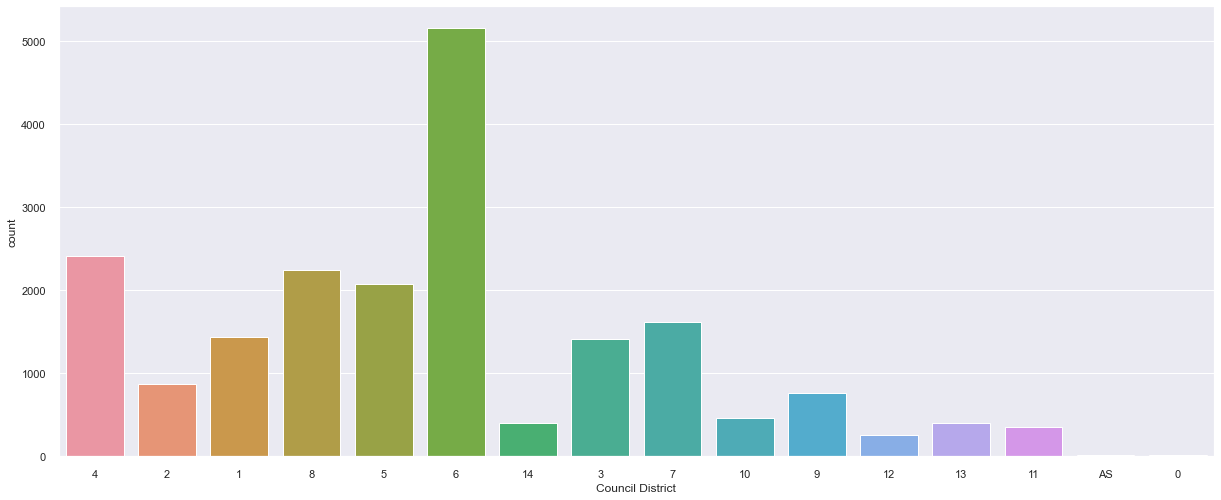

In [48]:
sns.countplot(df['Council District'])

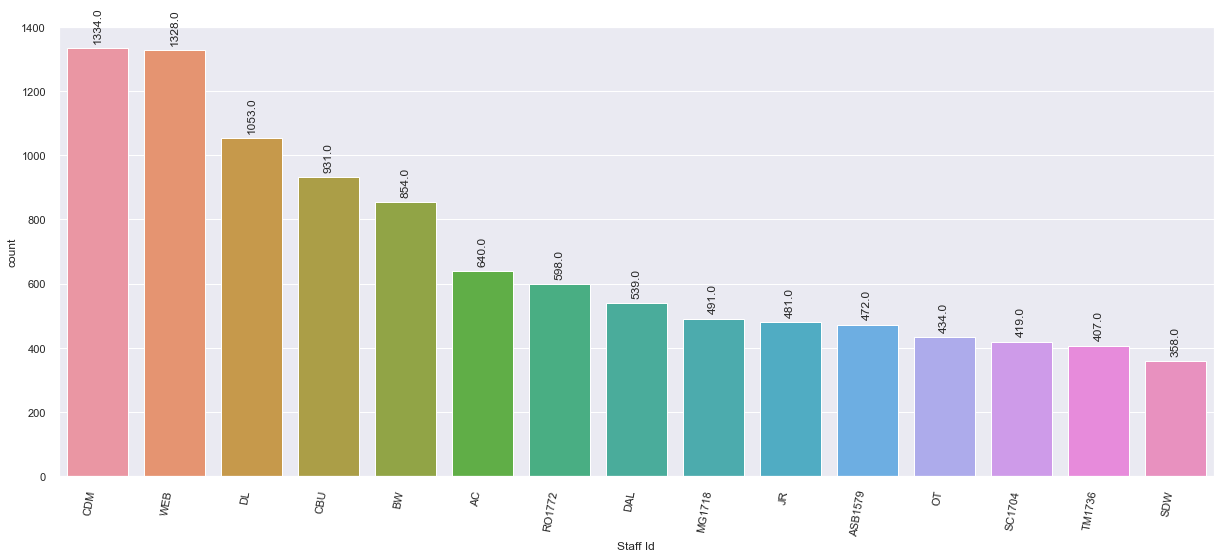

In [49]:
ax = sns.countplot(df['Staff Id'], order=df['Staff Id'].value_counts().iloc[:15].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

<AxesSubplot:xlabel='Month', ylabel='count'>

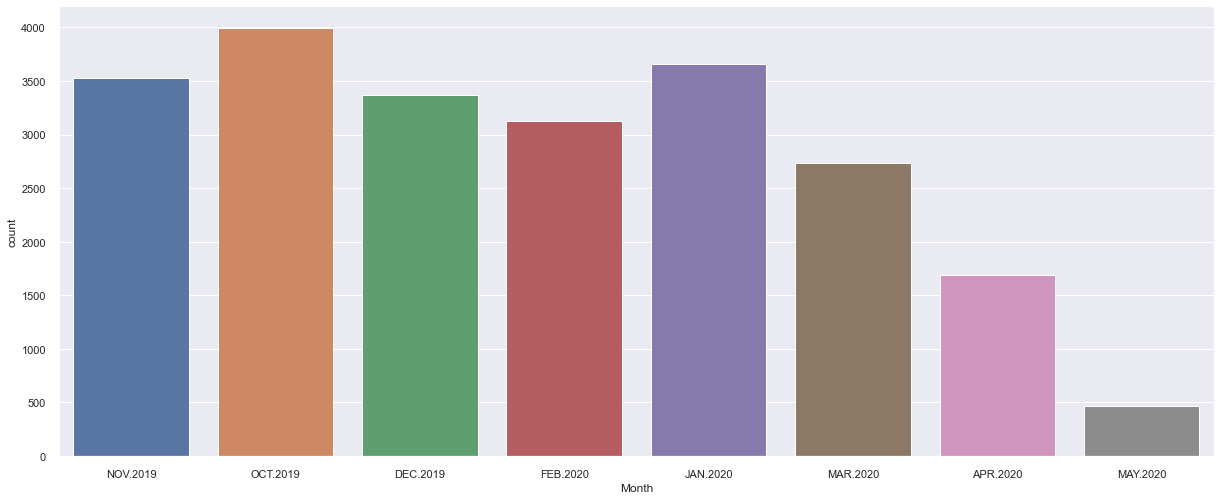

In [50]:
sns.countplot(df['Month'])

In [ ]:
#month does not seem particularly important, too small of a sample size to judge trends

In [55]:
df.loc[df['Receipt Number'] == 'R19-560515']

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Activity Number,Activity Sequence,Source Id,Census Tract,Council District,...,Outcome Date,Outcome Time,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month
10428,A1090325,CAT,DOMESTIC SH,F2,AVAILABLE,NaN,1,P0893338,20500,6,...,2019-12-22,11:58:00,R19-560515,K19-491684,NaN,APP SICK,SCAN NO CHIP,OVER THE COUNTER,NaN,DEC.2019
10913,A1090325,CAT,DOMESTIC SH,K13,UNAVAILABLE,NaN,1,P0843333,9611,13,...,2019-12-09,16:36:00,R19-560515,K19-490066,NaN,UNKNOWN,SCAN NO CHIP,OVER THE COUNTER,FOSTER,DEC.2019
10923,A1090322,CAT,DOMESTIC SH,K13,UNAVAILABLE,NaN,1,P0843333,9611,13,...,2019-12-09,16:35:00,R19-560515,K19-490063,NaN,UNKNOWN,SCAN NO CHIP,OVER THE COUNTER,FOSTER,DEC.2019
10960,A1090323,CAT,DOMESTIC SH,K13,UNAVAILABLE,NaN,1,P0843333,9611,13,...,2019-12-09,16:35:00,R19-560515,K19-490065,NaN,UNKNOWN,SCAN NO CHIP,OVER THE COUNTER,FOSTER,DEC.2019
11019,A1090321,CAT,DOMESTIC SH,FOSTER,UNAVAILABLE,NaN,1,P0843333,9611,13,...,2019-12-09,16:34:00,R19-560515,K19-490062,NaN,UNKNOWN,SCAN NO CHIP,OVER THE COUNTER,FOSTER,DEC.2019


In [ ]:
#there are duplicates for recipt number, is this relevant or an error?

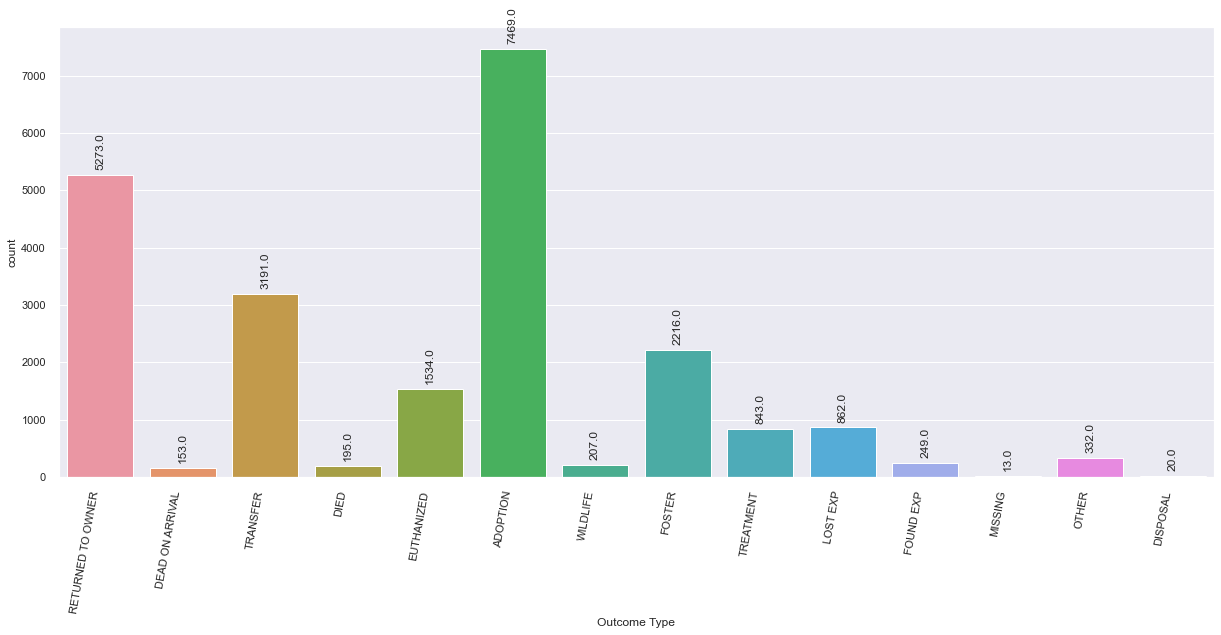

In [57]:
ax = sns.countplot(df['Outcome Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha="right")
add_value_labels(ax, rot=90)

In [47]:
#ok, so questions
#what animal and or breed is most likely to be picked up in a particular council district
#what animal and or breed is most likely to be put down in a particular council district
#what animal and or breed is most likely to be adopted in a particular council district
#how long does each type of animal stay impounded?
#is there an association by employee id and outcome?
#are there any particular types or breeds that get returned to owner?


In [ ]:
#how to get there
#separate entries by council district, there appear to be 14
#get countplots of them

